In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

## ATENÇÃO!

- A função train_test_split é usada para separar os conjuntos de dados em treino e teste.
- Apenas os conjuntos de treino devem ser utilizados para ajustar os modelos: não vale mudar parâmetros e ir verificando se a métrica melhora no conjunto de teste.
- O conjunto de teste é utilizado apenas para calcular a métrica final.

## Exercício 1

Ajuste um modelo linear e um modelo não-linear à sua escolha ao conjunto de treino abaixo (X_train e y_train).
1. Calcule o erro médio quadrático de cada modelo no conjunto de teste.
2. Plote suas predições e o valor real observado, qual modelo você julga mais indicado e porquê?
3. Teste alguns parâmetros para os modelos e verifique o que muda.

In [2]:
sp = pd.read_csv('../Dados/SP500.csv')

X, y = sp.drop('S&P500NextWeek',axis=1), sp['S&P500NextWeek']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=3)

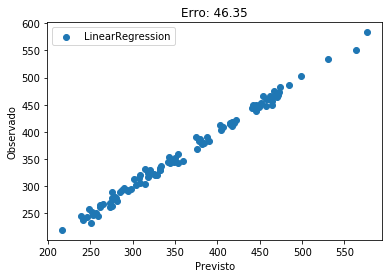

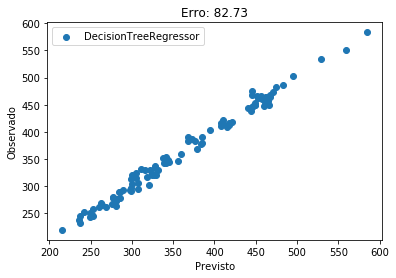

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

modelos = [LinearRegression(), DecisionTreeRegressor()]

for modelo in modelos:
    reg = modelo
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    
    plt.scatter(y_pred,y_test,label=type(modelo).__name__)
    plt.title('Erro: %.2f'%mean_squared_error(y_test,y_pred))
    plt.xlabel('Previsto')
    plt.ylabel('Observado')
    plt.legend()
    plt.show()

## Exercício 2

Máscara de halloween.
Crie um modelo que seja capaz de reconstruir a máscara do dataset 'mask.csv', usando apenas o conjunto de dados de treino como entrada.

Teste diferente pelo menos 3 métodos diferentes (Regressão Logística, KNN, SVM, Redes Neurais...), e compare com o desenho original. Qual modelo você escolheria?

Calcule a acurácia do modelo para te ajudar na decisão.

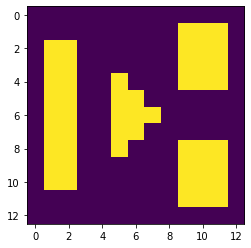

In [4]:
def show_mask(df):
    m = np.empty((13,13)) # 
    for i, col in df.iterrows():
        m[col['x0'],col['x1']] = col['y']
        
    plt.imshow(m)
    
mask = pd.read_csv('../Dados/mask.csv')
show_mask(mask)

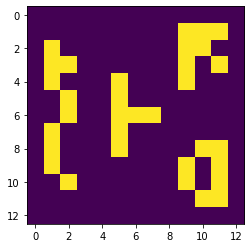

In [5]:
train = mask.sample(frac=0.7,random_state=3)
test  = mask.drop(train.index)

show_mask(train)

X_train, y_train = train.drop('y',axis=1), train['y']
X_test,  y_test  = test.drop('y',axis=1),  test['y']

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

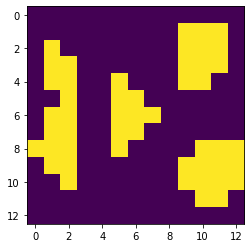

In [7]:
X_test['y'] = pred
new_mask = pd.concat([train,X_test])

show_mask(new_mask)

## Exercício 3

Conjunto de dados Iris.
1. Ajuste um modelo de classificação ao conjunto de dados iris.
2. Use a função sklearn.metrics.classification_report para avaliar seu modelo.
3. Analise e explique a saída do relatório.
4. Teste modelos e parâmetros diferentes.

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10)

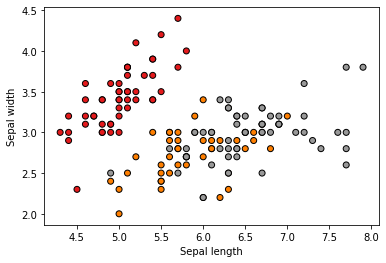

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [10]:
from sklearn.metrics import classification_report 

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.77      0.87        13
           2       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30



C:\Users\rodri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rodri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
